In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import pickle

#### We want to discover if there is any relationship between health resouces and socio demographic data. Choose one target variable (related to health resources), and use the LASSO model to reduce features to the most important ones for your target.

In [34]:
# Example importing the CSV here
#Step 1

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')

pd.set_option('display.max_columns',110)

df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [36]:
df.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
193,6019,994400,157876,15.876508,151278,15.212993,151181,15.203238,139138,13.992156,114384,11.502816,109615,11.023230,89484,8.998793,51600,5.189059,29844,3.001207,762683,76.697808,57839,5.816472,29536,2.970233,109851,11.046963,2739,0.275442,31752,3.193081,994400,7858,16963,15.0,7.3,7.6,1.3,-1.0,0.3,147389,136851,188858,123407,24.7,22.9,31.7,20.7,208627,21.3,30.2,29.3,52318,50516,54120,448353,414926,33427,7.5,52318,69.5,279.6,243.8,96.2,87.1,7.2,6.2,387.482978,199.020549,9.024678,562.169576,382.053088,1477.407688,164,971616,157757,16.2,Fresno,California,6,19,712581,41.0,39.6,42.4,292272,33.5,32.5,34.6,238715,6.7,6.2,7.2,47503,6.6,5.9,7.4,47342,12.0,11.4,12.7,85769,3.3,3.2,3.5,23776,3
1966,37157,90690,9633,10.621899,10658,11.752123,10196,11.242695,9422,10.389238,11293,12.452310,13927,15.356710,12932,14.259566,8255,9.102437,4374,4.823023,70401,77.628184,17200,18.965707,549,0.605359,609,0.671518,96,0.105855,1835,2.023376,90690,-151,1029,9.6,12.9,-3.2,0.3,1.4,1.7,11394,22602,21679,9789,17.4,34.5,33.1,15.0,16003,17.9,26.0,24.2,41869,39387,44351,40499,38670,1829,4.5,41869,77.6,255.0,223.5,86.2,78.1,7.1,6.2,41.198034,37.049409,0.978202,44.150109,35.145408,130.825811,9,91566,24175,26.4,Rockingham,North Carolina,37,157,72303,49.3,47.1,51.2,35630,36.9,35.4,38.5,26680,9.6,8.7,10.4,6913,10.6,9.2,12.0,7639,14.9,13.9,15.9,10773,3.8,3.6,4.1,2781,3
2435,47019,56351,5242,9.302408,6169,10.947454,65

In [37]:
##hacemos la lista de variable
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [38]:
len(list(df.columns))

108

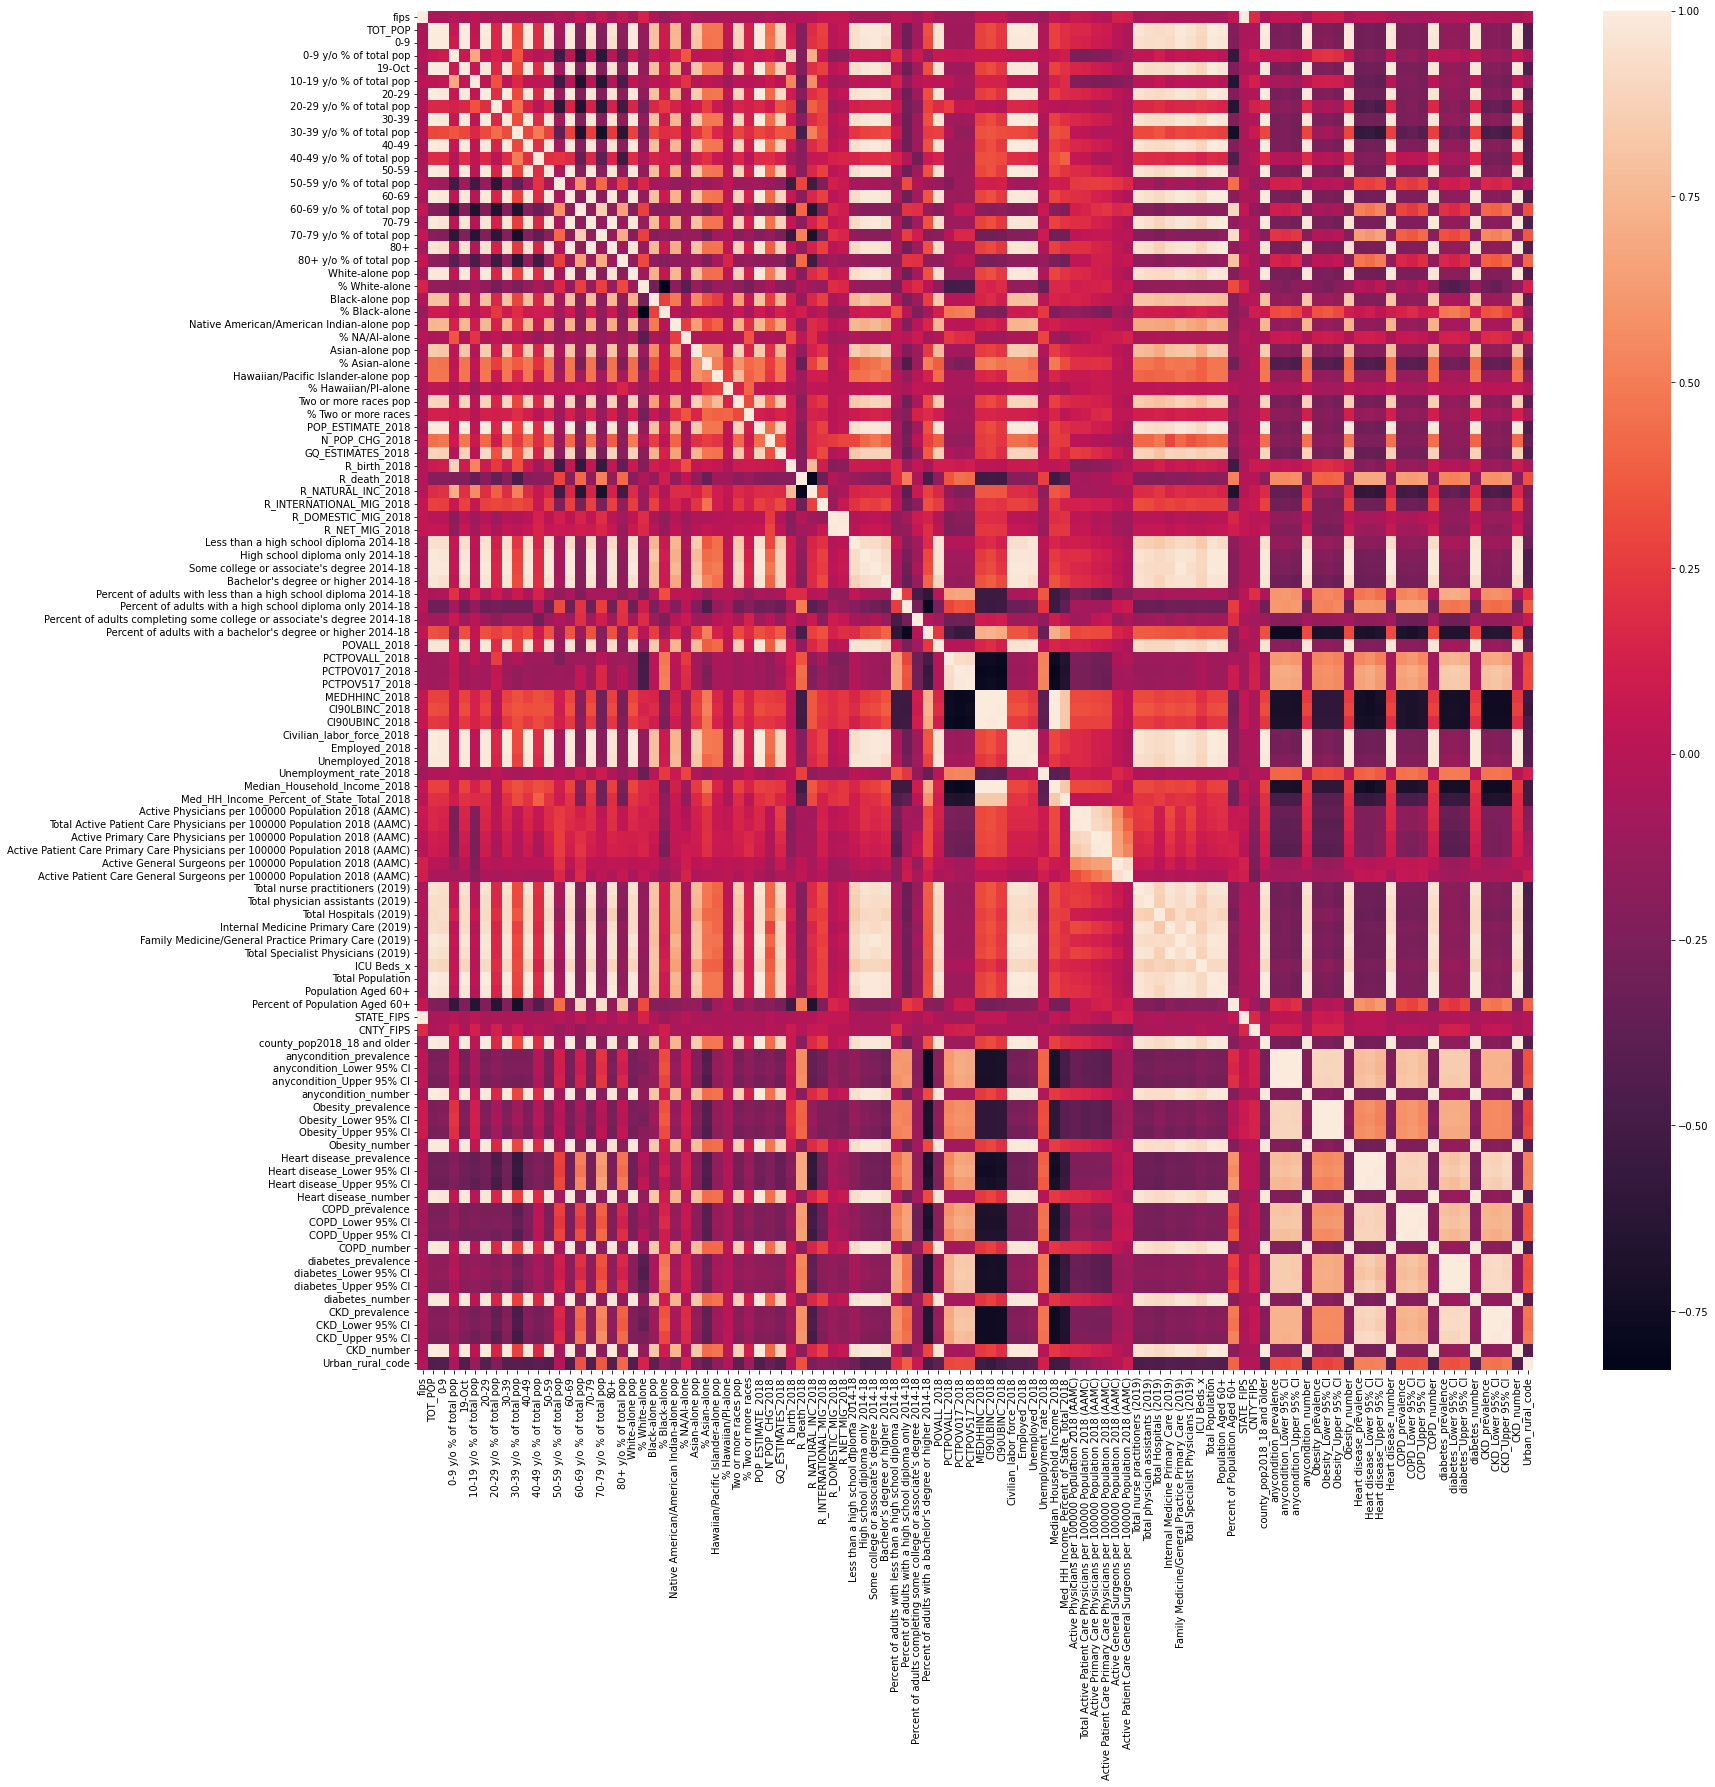

In [39]:
#Hacemos el EDA para ver q hacemos
#Step 2
#armo un correlation matrix   , mapa de calor
plt.figure(figsize=(25,25))
corr_matrix = df.corr()
hit_map = sns.heatmap(corr_matrix,annot=False)
plt.show()

#buscamos zonas bien ocuras las negras, son correlaciones negativas altas
#las claras son correlaciones positivas altas
#vemos q grupo 
#elegimos una variable, Camila nos pasa un codigo, vemos la var y aplicamos LASO


#Vemos las vars de salud y vemos algunas, me pide hacer la regresion, busco q vars estan correlacionadas entre si
#X = df[''] #esta es nuestra var X son las variables predictoras
#y = df['']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)


In [40]:
print(corr_matrix)

                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [41]:
#Vamos a predecir la prevalencia de las enfermedades al corazon, usamos la var Heart disease_prevalence

df_heart_disease = pd.DataFrame(df.corrwith(df['Heart disease_prevalence'],axis=0),columns=['Correlacion'])

In [42]:
#filtramos y vemos los q son mayores a X numero, para establecer cierto umbral

df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8] #esto nos da las vars q vamos a sacar del modelo, las dropeamos

,Correlacion
Heart disease_prevalence,1.000000
Heart disease_Lower 95% CI,0.997441
Heart disease_Upper 95% CI,0.997752
COPD_prevalence,0.886726
COPD_Lower 95% CI,0.877945
COPD_Upper 95% CI,0.890111
diabetes_prevalence,0.831021
diabetes_Lower 95% CI,0.806340
diabetes_Upper 95% CI,0.850717
CKD_prevalence,0.892792


In [43]:
df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8].index #la lista de las vars a elminiar

Index(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],
      dtype='object')

In [44]:
x = df.drop(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],axis=1)
y = df['Heart disease_prevalence']

In [45]:
x.sample(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
2857,51081,11627,1143,9.830567,1095,9.417735,1658,14.259912,1786,15.360798,1836,15.790832,1633,14.044896,1339,11.516298,788,6.777329,349,3.001634,4438,38.169777,6929,59.594048,32,0.275221,98,0.842866,1,0.008601,129,1.109487,11627,-89,3413,11.2,9.9,1.3,0.1,-9.2,-9.1,2113,3625,2290,793,24.0,41.1,26.0,9.0,2183,26.7,27.2,26.7,43533,38740,48326,4388,4227,161,3.7,43533,60.0,263.2,231.8,90.3,81.7,7.3,6.3,6.112659,2.869319,0.131044,5.798700,5.090243,16.041977,0,11606,2403,20.7,Greensville,Virginia,51,81,9611,55.4,53.5,57.2,5324,41.1,39.6,42.7,3950,846,923,1607,376,6
2678,48315,9928,952,9.589041,1018,10.253828,888,8.944400,977,9.840854,1039,10.465351,1589,16.005238,1659,16.710314,1246,12.550363,560,5.640612,7350,74.033038,2119,21.343674,124,1.248993,90,0.906527,8,0.080580,237,2.387188,9928,-145,154,8.0,14.9,-6.9,-0.1,-7.5,-7.6,1250,3083,2114,1126,16.5,40.7,27.9,14.9,2135,21.9,34.0,32.4,38011,34088,41934,4260,4065,195,4.6,38011,62.7,224.8,199.9,72.9,66.5,6.2,5.4,3.424421,2.021100,0.180906,3.756486,3.324801,11.725356,0,10140,3384,33.4,Marion,Texas,48,315,8132,54.8,52.7,56.8,4457,40.4,38.7,42.1,3285,960,948,1481,370,6
2039,38103,3957,472,11.928228,428,10.816275,322,8.137478,369,9.325246,347,8.769270,600,15.163002,603,15.238817,444,11.220622,372,9.401061,3837,96.967400,14,0.353803,33,0.833965,11,0.277988,5,0.126358,57,1.440485,3957,-75,85,12.3,14.3,-2.0,2.3,-19.3,-17.0,450,1025,860,662,15.0,34.2,28.7,22.1,442,11.4,14.5,13.0,58261,52731,63791,2017,1956,61,3.0,58261,89.3,237.6,217.1,87.0,79.6,10.5,9.7,2.379166,1.181774,0.203036,1.827324,3.055952,4.701064,0,4089,1423,34.8,Wells,North Dakota,38,103,3125,48.6,45.8,51.2,1519,34.2,32.3,36

In [46]:
df.shape #veo las vars q quedaron
#3140 observaciones en 108 columnas

(3140, 108)

In [47]:
df.describe(include='O')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [48]:
x = x.drop(['COUNTY_NAME'], axis=1)

In [49]:
x = pd.get_dummies(x,drop_first=True) #toma vars categoricas y las pasa a dummies. los string los encodeo en 0 y 1

#scamos el county name porq es mucho agregar 1841 categorias lo podria dejar para otro estudio, ahora las elimino

In [50]:
x.sample(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,...,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,STATE_NAME_Alaska,STATE_NAME_Arizona,STATE_NAME_Arkansas,STATE_NAME_California,STATE_NAME_Colorado,STATE_NAME_Connecticut,STATE_NAME_Delaware,STATE_NAME_District of Columbia,STATE_NAME_Florida,STATE_NAME_Georgia,STATE_NAME_Hawaii,STATE_NAME_Idaho,STATE_NAME_Illinois,STATE_NAME_Indiana,STATE_NAME_Iowa,STATE_NAME_Kansas,STATE_NAME_Kentucky,STATE_NAME_Louisiana,STATE_NAME_Maine,STATE_NAME_Maryland,STATE_NAME_Massachusetts,STATE_NAME_Michigan,STATE_NAME_Minnesota,STATE_NAME_Mississippi,STATE_NAME_Missouri,STATE_NAME_Montana,STATE_NAME_Nebraska,STATE_NAME_Nevada,STATE_NAME_New Hampshire,STATE_NAME_New Jersey,STATE_NAME_New Mexico,STATE_NAME_New York,STATE_NAME_North Carolina,STATE_NAME_North Dakota,STATE_NAME_Ohio,STATE_NAME_Oklahoma,STATE_NAME_Oregon,STATE_NAME_Pennsylvania,STATE_NAME_Rhode Island,STATE_NAME_South Carolina,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
1274,26091,98266,10817,11.007877,12602,12.824375,12103,12.316569,11358,11.558423,12085,12.298252,13587,13.826756,13305,13.539780,8132,8.275497,4277,4.352472,92102,93.727230,2937,2.988826,604,0.614658,494,0.502717,41,0.041723,2088,2.124845,98266,-216,5120,10.4,10.1,0.3,0.6,-3.1,-2.5,6278,25224,22343,14199,9.2,37.1,32.8,20.9,9668,10.4,14.0,13.2,55762,53013,...,6482,7337,9005,2465,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1253,26049,406892,48796,11.992371,52497,12.901949,52669,12.944221,46464,11.419246,49698,12.214052,56900,13.984055,51656,12.695261,30710,7.547457,17502,4.301387,306705,75.377496,82406,20.252549,2300,0.565261,4281,1.052122,107,0.026297,11093,2.726276,406892,-781,5860,11.4,11.2,0.2,0.5,-2.6,-2.1,26624,88970,104807,58329,9.6,31.9,37.6,20.9,75251,18.8,28.9,25.8,48370,46383,...,26844,33114,39651,11059,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2207,41003,92101,7775,8.441819,12831,13.931445,22480,24.407987,10011,10.869589,9024,9.797939,9482,10.295219,10856,11.787060,6330,6.872890,3312,3.596052,79637,86.467031,1115,1.210627,777,0.843639,6555,7.117187,245,0.266012,3772,4.095504,92101,534,5325,8.2,6.4,1.8,5.2,-1.2,4.1,2479,7563,15157,29165,4.6,13.9,27.9,53.6,13739,15.8,11.9,9.9,63600,58874,...,4488,4562,6380,1977,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1202,24025,253956,29560,11.639812,32655,12.858527,30455,11.992235,32540,12.813243,32081,12.632503,38650,15.219172,30454,11.991841,18434,7.258738,9127,3.593930,201159,79.210178,36883,14.523382,824,0.324466,7802,3.072186,271,0.106711,7017,2.763077,2

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=53, test_size=0.15)

In [52]:
#corremos las regresion Laso, para ver q var nos quedan, esto saca las otras var q no son redundantes para el modelo
modelo = Lasso(alpha = 0.3,normalize = True)
modelo.fit(X_train,y_train)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.3, normalize=True)

In [53]:
#hacemos la prediccion y vemos el tipo de error

predicciones = modelo.predict(X_test)


In [54]:
rmse_lasso = mean_squared_error(y_true = y_test,
                                y_pred = predicciones,
                                squared = False
                               )
print(f"RMSE de test es: {rmse_lasso}")

RMSE de test es: 1.763186789771643


In [55]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error

modelo2 = LassoCV(
                    alphas = np.logspace(-10, 3, 200),
                    normalize = True,
                    cv = 10
                 )
_ = modelo2.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8210722286966075, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9171276780088533, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5575986178185417, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versi

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

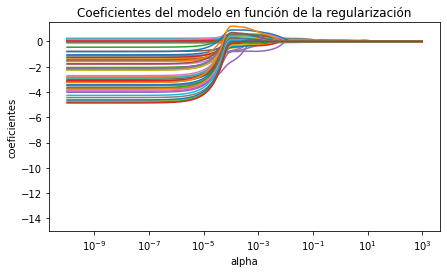

In [56]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo2.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')


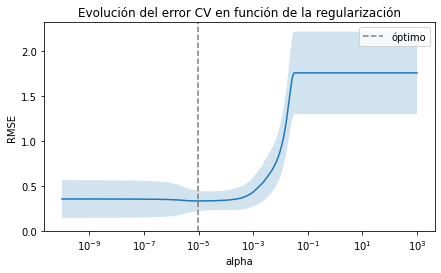

In [57]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)

mse_cv = modelo2.mse_path_.mean(axis=1)
mse_sd = modelo2.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse = np.min(rmse_cv)
sd_min_rmse = rmse_sd[np.argmin(rmse_cv)]
optimo = modelo2.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo2.alphas_, rmse_cv)
ax.fill_between(
                modelo2.alphas_,
                rmse_cv + rmse_sd,
                rmse_cv - rmse_sd,
                alpha=0.2
                )

ax.axvline(
            x = optimo,
            c = "gray",
            linestyle = '--',
            label = 'óptimo'
          )



ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [58]:
#grafica q mide el error con los dif alfas, vemos el alfa optimo es 
print(f"Mejor valor de alpha encontrado: {modelo2.alpha_}")

Mejor valor de alpha encontrado: 9.221978823334342e-06


Se enctró el mejor valor de alpha y se aplica al modelo de LASSO

In [59]:
alfa_optimo = modelo2.alpha_

modelo = Lasso(alpha = alfa_optimo,normalize = True)
modelo2.fit(X_train,y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8210722286966075, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9171276780088533, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5575986178185417, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versi

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10, normalize=True)

In [60]:
#hacemos predicciones con el nuevo modelo entrenad y vemos el tipo de error

predicciones2 = modelo2.predict(X_test)

In [63]:
rmse_lasso2 = mean_squared_error(y_true = y_test,
                                 y_pred = predicciones2,
                                 squared = False
                                )
print(f"RMSE de test es: {rmse_lasso2}")

RMSE de test es: 0.36276920221689946


Dados los ajustes realizados al valor alpha se pudo confirmar que hay un mejor ajuste al modelo.

In [64]:
filename = '/workspace/REGULARIZED-LINEAR.-REG./models/finalized_model.sav' 
pickle.dump(modelo2, open(filename, 'wb'))